# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [44]:
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel,  RFE
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector, TransformedTargetRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn import set_config
set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [45]:
#df = pd.read_csv('Downloads/practical_application_II_starter/data/vehicles.csv')
filename = '/Users/rajeshgoyal/Desktop/vehicles.csv'
df = pd.read_csv(filename)

In [46]:
df.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [48]:
df=df.dropna()

In [49]:
df.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

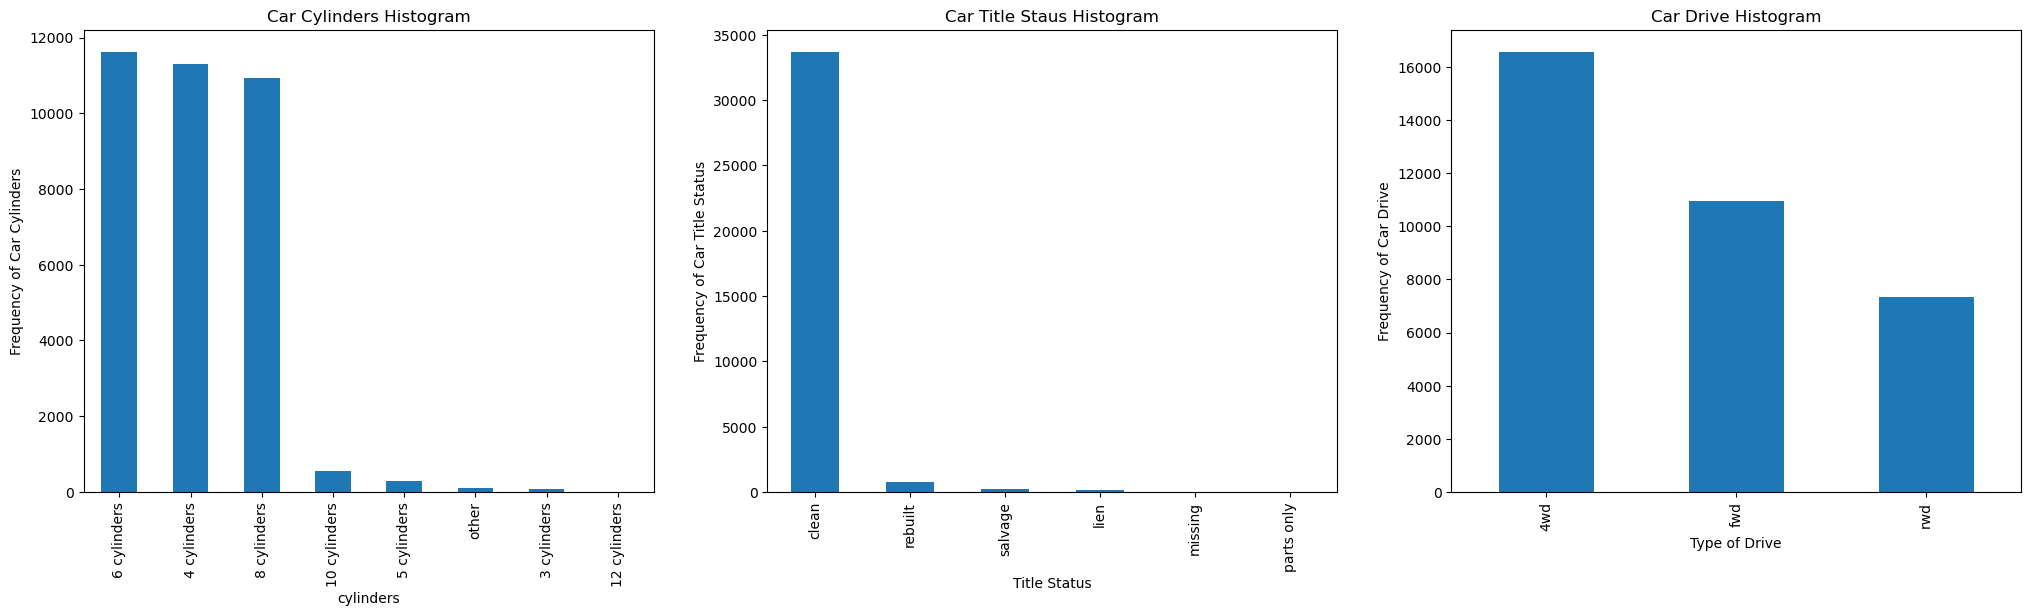

In [51]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.cylinders.value_counts().plot(kind='bar')
plt.title('Car Cylinders Histogram')
plt1.set(xlabel = 'cylinders', ylabel='Frequency of Car Cylinders')

plt.subplot(1,3,2)
plt1 = df.title_status.value_counts().plot(kind='bar')
plt.title('Car Title Staus Histogram')
plt1.set(xlabel = 'Title Status', ylabel='Frequency of Car Title Status')

plt.subplot(1,3,3)
plt1 = df.drive.value_counts().plot(kind='bar')
plt.title('Car Drive Histogram')
plt1.set(xlabel = 'Type of Drive', ylabel='Frequency of Car Drive')


plt.show()

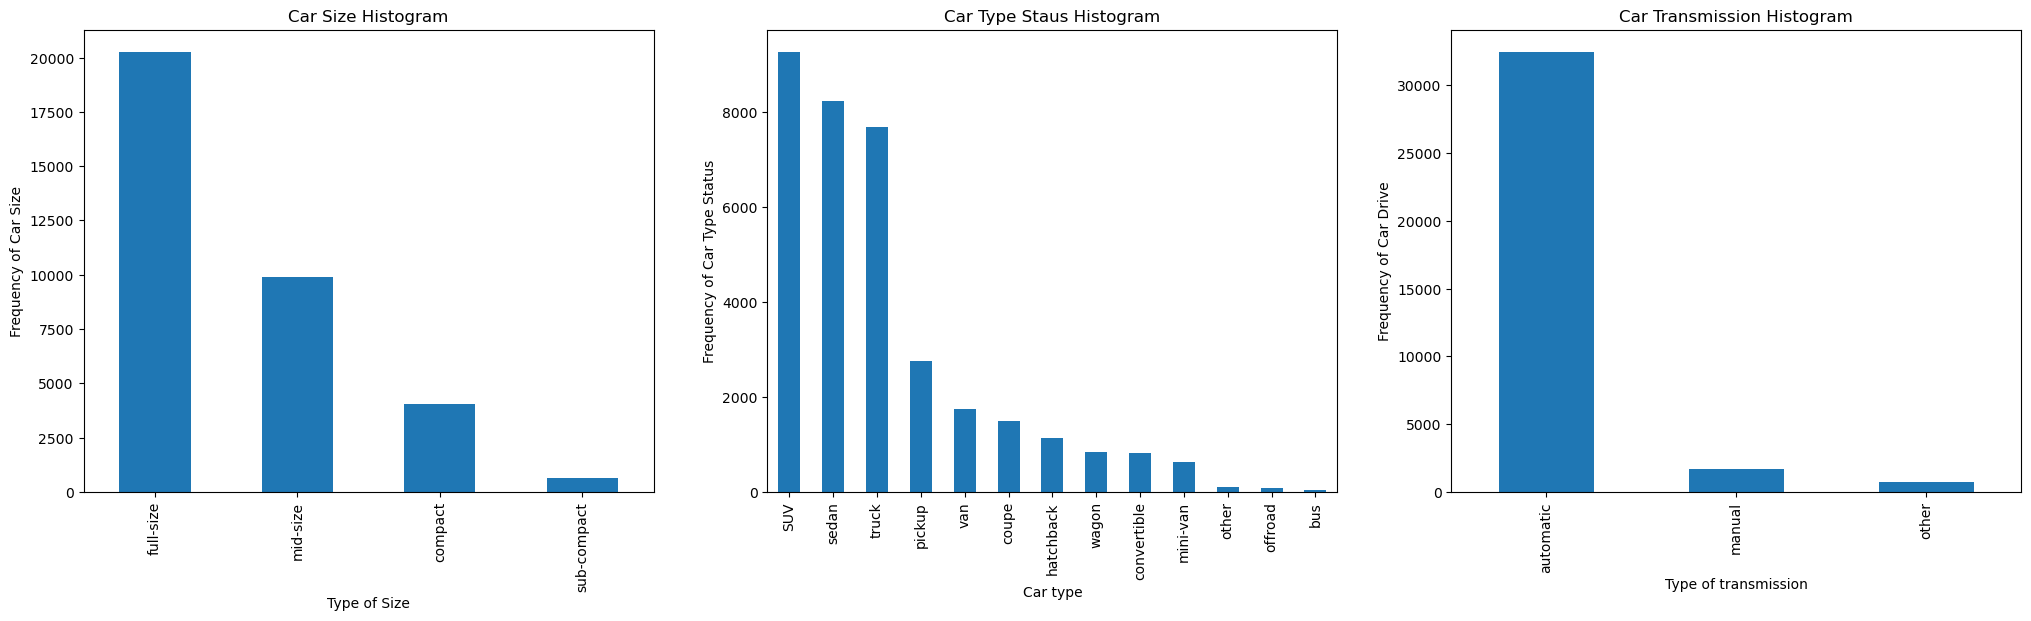

In [52]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df['size'].value_counts().plot(kind='bar')
plt.title('Car Size Histogram')
plt1.set(xlabel = 'Type of Size', ylabel='Frequency of Car Size')

plt.subplot(1,3,2)
plt1 = df.type.value_counts().plot(kind='bar')
plt.title('Car Type Staus Histogram')
plt1.set(xlabel = 'Car type', ylabel='Frequency of Car Type Status')

plt.subplot(1,3,3)
plt1 = df.transmission.value_counts().plot(kind='bar')
plt.title('Car Transmission Histogram')
plt1.set(xlabel = 'Type of transmission', ylabel='Frequency of Car Drive')
plt.show()

# Checking any Duplication

In [53]:
df.loc[df.duplicated()]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state


In [55]:
df['fuel'] = df['fuel'].replace({'other': 'fuel_other'})
df['cylinders'] = df['cylinders'].replace({'other': 'cylinders_other'})
df['type'] = df['type'].replace({'other': 'type_other'})
df['transmission'] = df['transmission'].replace({'other': 'transmission_other'})

# Checking Outliers

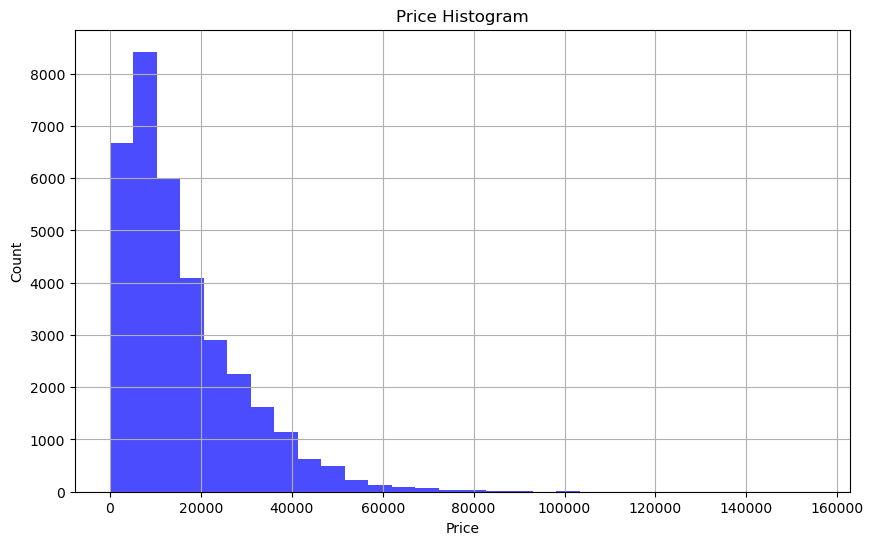

In [56]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='blue', alpha=0.7)  # Plot histogram with 30 bins
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)
plt.savefig("odometer_histogram.png", dpi=300)  # Save the plot as an image
plt.show()

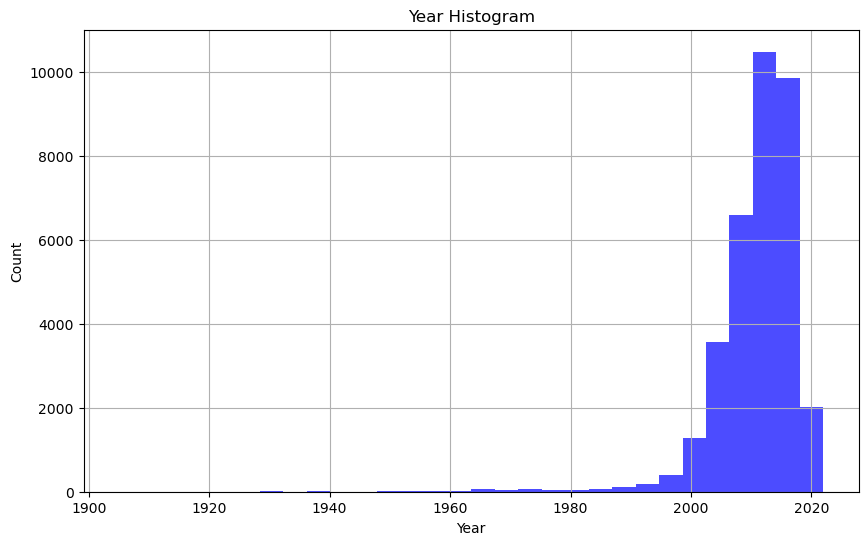

In [57]:

plt.figure(figsize=(10, 6))
plt.hist(df['year'], bins=30, color='blue', alpha=0.7)  # Plot histogram with 30 bins
plt.title('Year Histogram')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.savefig("odometer_histogram.png", dpi=300)  # Save the plot as an image
plt.show()

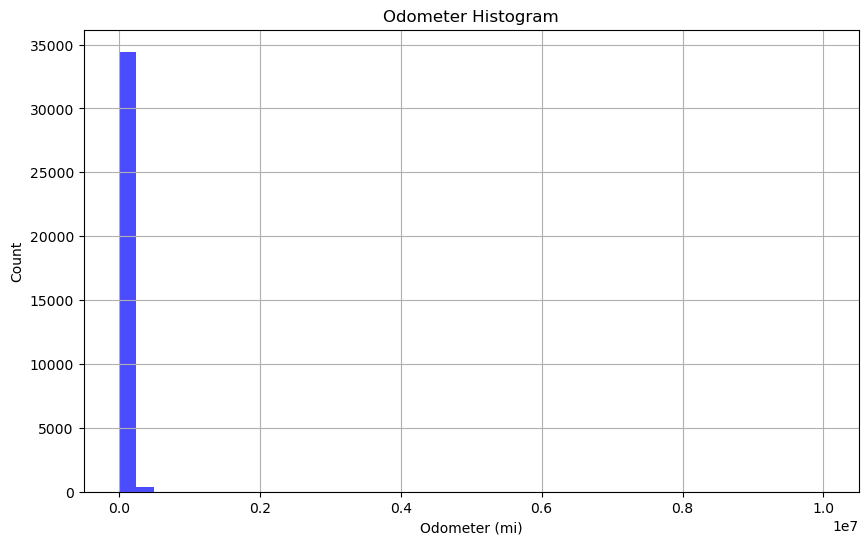

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(df['odometer'], bins=40, color='blue', alpha=0.7)  # Plot histogram with 30 bins
plt.title('Odometer Histogram')
plt.xlabel('Odometer (mi)')
plt.ylabel('Count')
plt.grid(True)
plt.savefig("odometer_histogram.png", dpi=300)  # Save the plot as an image
plt.show()

In [59]:
df.describe().round(2)

,id,price,year,odometer
count,3.486800e+04,34868.00,34868.00,34868.00
mean,7.311508e+09,15837.45,2011.18,107399.09
std,4.299751e+06,13460.06,7.16,99908.78
min,7.301592e+09,0.00,1905.00,0.00
25%,7.308189e+09,6500.00,2008.00,65164.00
50%,7.312225e+09,12000.00,2013.00,104000.00
75%,7.315136e+09,22003.50,2016.00,141167.75
max,7.317099e+09,155000.00,2022.00,9999999.00


In [61]:
df.drop(columns=['id', 'region', 'title_status', 'VIN','state','model'], inplace=True)

In [62]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
126,0,2018.0,chevrolet,like new,6 cylinders,gas,68472.0,automatic,rwd,full-size,van,white
127,0,2019.0,chevrolet,like new,6 cylinders,gas,69125.0,automatic,rwd,full-size,van,white
128,0,2018.0,chevrolet,like new,6 cylinders,gas,66555.0,automatic,rwd,full-size,van,white
215,4000,2002.0,toyota,excellent,4 cylinders,gas,155000.0,automatic,fwd,compact,sedan,blue
219,2500,1995.0,bmw,fair,6 cylinders,gas,110661.0,automatic,rwd,mid-size,sedan,white


In [63]:
df.shape

(34868, 12)

In [64]:
def outlierstreat(data,variable):
    first_quartile=data[variable].quantile(0.25)
    third_quartile=data[variable].quantile(0.75)
    iqr= third_quartile - first_quartile
    lower=first_quartile - 1.5*iqr
    lower=0 if lower<0 else lower
    upper=upper=third_quartile + 1.5*iqr
    0 if upper<0 else upper
    print(lower,upper)
    data=data[(data[variable] < upper) &  (data[variable] > lower)]
    return data

In [65]:
variables=["price","odometer","year"]

In [66]:
for variable in variables:
    df=outlierstreat(df,variable)    

0 45258.75
0 255000.0
1997.5 2025.5


In [67]:
df.shape

(29939, 12)

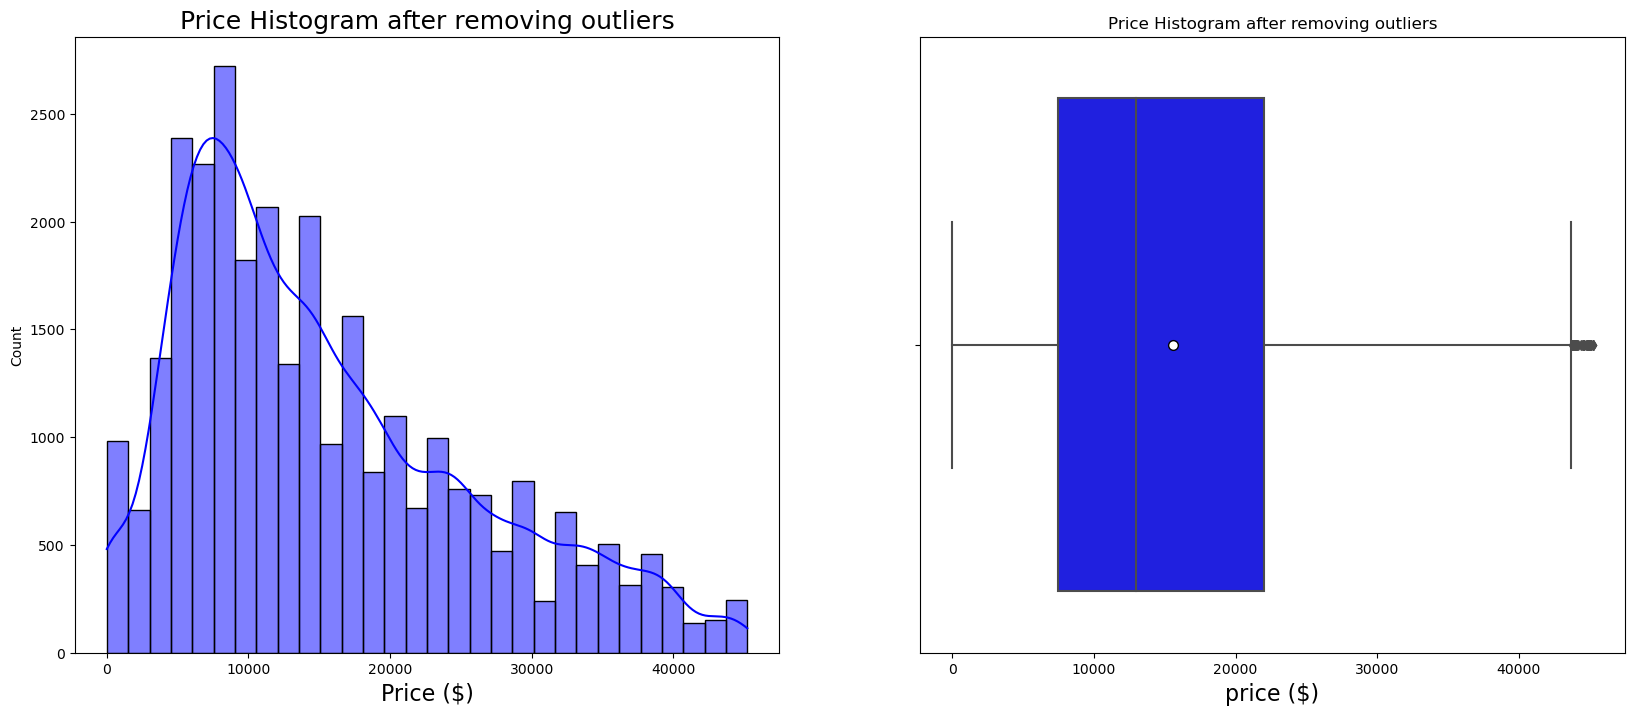

In [139]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="price",kde=True, color="blue",bins=30, ax=axes[0])
ax.set_title('Price Histogram after removing outliers', fontsize=18)
ax.set_xlabel('Price ($)',fontsize=16)
ax = sns.boxplot(x=df["price"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="blue")
ax.set_xlabel('price ($)',fontsize=16)
plt.title('Price Histogram after removing outliers')
plt.savefig("log_prices.png",dpi=300)
plt.show()

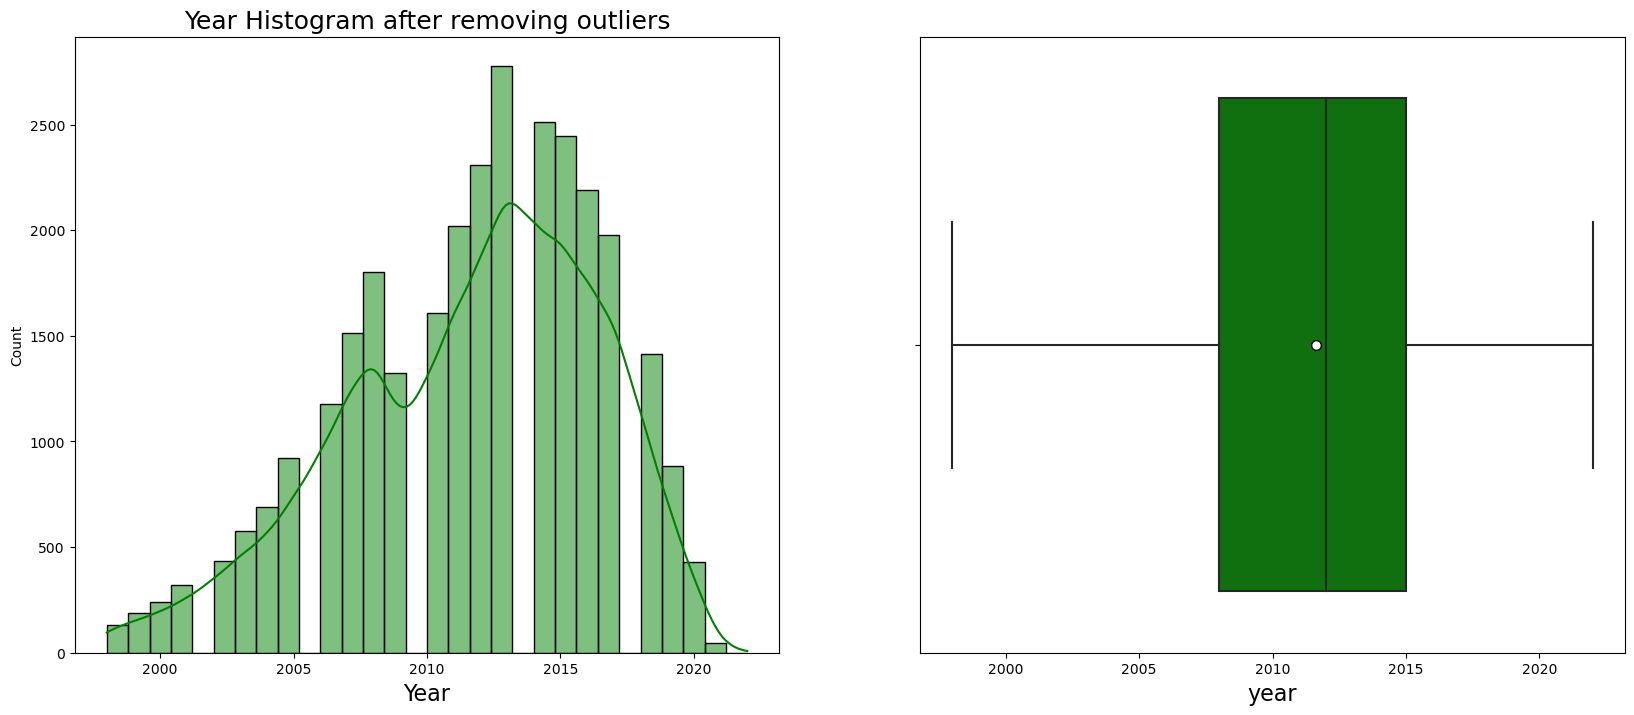

In [140]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="year",kde=True, color="green",bins=30, ax=axes[0])
ax.set_xlabel('Year',fontsize=16)
ax.set_title('Year Histogram after removing outliers', fontsize=18)
ax = sns.boxplot(x=df["year"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="green")
ax.set_xlabel('year',fontsize=16)
plt.savefig("log_prices.png",dpi=300)
plt.show()

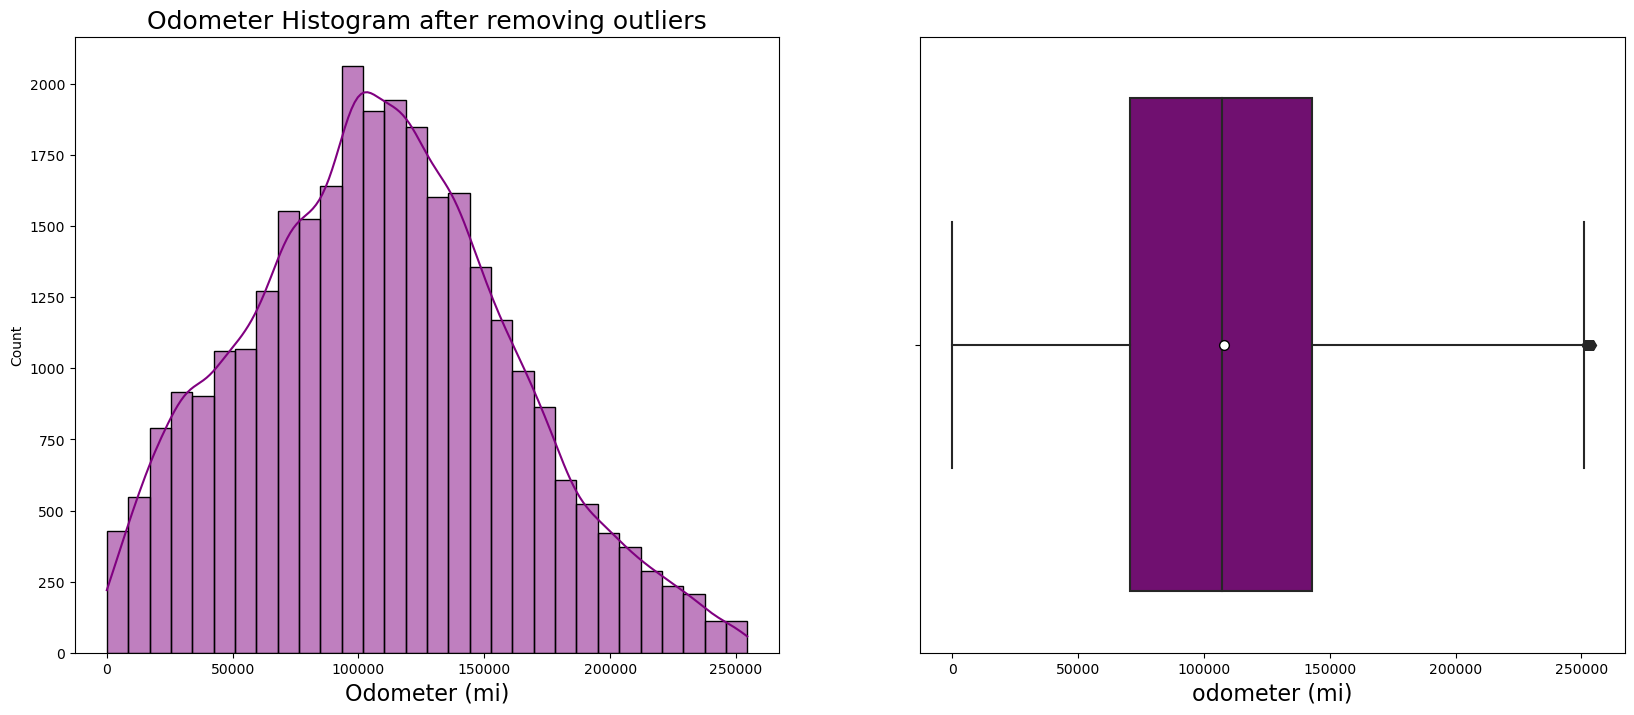

In [141]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="odometer",kde=True, color="purple",bins=30,ax=axes[0])
ax.set_xlabel('Odometer (mi)',fontsize=16)
ax.set_title('Odometer Histogram after removing outliers', fontsize=18)
ax = sns.boxplot(x=df["odometer"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="purple")
ax.set_xlabel('odometer (mi)',fontsize=16)
plt.savefig("log_prices.png",dpi=300)
plt.show()

# Initialize OneHotEncoder

In [70]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

In [71]:
encoded_df = pd.get_dummies(df, dtype=int, columns=['cylinders', 'transmission', 'condition', 'manufacturer','paint_color', 'fuel'])
encoded_df = encoded_df.drop(columns =['year', 'odometer','price'])
# Concatenate the original DataFrame with the encoded DataFrame
result = pd.concat([df, encoded_df], axis=1)
result['price']=result['price'].div(10000)
result['year']=result['year'].div(1000)
result.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,size,...,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,fuel_diesel,fuel_electric,fuel_fuel_other,fuel_gas,fuel_hybrid
215,0.400,2.002,toyota,excellent,4 cylinders,gas,155000.0,automatic,fwd,compact,...,0,0,0,0,0,0,0,0,1,0
268,0.900,2.008,mazda,excellent,4 cylinders,gas,56700.0,automatic,rwd,compact,...,0,0,0,1,0,0,0,0,1,0
337,0.895,2.011,ford,excellent,6 cylinders,gas,164000.0,automatic,fwd,full-size,...,0,0,0,1,0,0,0,0,1,0
355,0.940,2.008,mercedes-benz,good,6 cylinders,gas,129473.0,automatic,rwd,full-size,...,0,0,1,0,0,0,0,0,1,0
364,0.730,2.007,lexus,good,6 cylinders,gas,181000.0,automatic,fwd,mid-size,...,0,0,0,1,0,0,0,0,1,0


In [72]:
result.dtypes

price              float64
year               float64
manufacturer        object
condition           object
cylinders           object
                    ...   
fuel_diesel          int64
fuel_electric        int64
fuel_fuel_other      int64
fuel_gas             int64
fuel_hybrid          int64
Length: 87, dtype: object

# Calculate permutation importances

In [73]:
X=result.drop(['price','manufacturer','condition','cylinders','fuel','type','transmission','size','paint_color',
            'drive'], axis = 1)
y = result['price']

In [74]:
X_train, X_test, y_train, y_test =train_test_split( X, y, test_size=0.3, random_state=22)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [76]:
# Calculate permutation importances
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)
importances = pd.DataFrame(data=perm_importance.importances_mean, index=X_test.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
importances.head(20)


,Importance
year,0.692828
odometer,0.348843
cylinders_8 cylinders,0.327850
fuel_diesel,0.170032
cylinders_4 cylinders,0.143630
transmission_transmission_other,0.088241
cylinders_6 cylinders,0.066630
manufacturer_ford,0.021845
cylinders_10 cylinders,0.019611
manufacturer_toyota,0.019113


In [77]:
importances.index.unique()

Index(['year', 'odometer', 'cylinders_8 cylinders', 'fuel_diesel',
       'cylinders_4 cylinders', 'transmission_transmission_other',
       'cylinders_6 cylinders', 'manufacturer_ford', 'cylinders_10 cylinders',
       'manufacturer_toyota', 'condition_excellent', 'manufacturer_bmw',
       'manufacturer_chevrolet', 'manufacturer_dodge',
       'manufacturer_mercedes-benz', 'condition_good', 'paint_color_white',
       'manufacturer_ram', 'manufacturer_jeep', 'fuel_gas',
       'paint_color_black', 'manufacturer_audi', 'manufacturer_nissan',
       'manufacturer_lexus', 'paint_color_custom', 'manufacturer_subaru',
       'manufacturer_porsche', 'manufacturer_volkswagen', 'paint_color_silver',
       'manufacturer_rover', 'manufacturer_gmc', 'paint_color_grey',
       'manufacturer_volvo', 'paint_color_blue', 'condition_like new',
       'transmission_automatic', 'manufacturer_mitsubishi',
       'manufacturer_honda', 'paint_color_brown', 'manufacturer_chrysler',
       'manufacturer_k

In [78]:
X1=result[['year', 'odometer', 'cylinders_8 cylinders', 'fuel_diesel',
       'cylinders_4 cylinders', 'transmission_transmission_other',
       'cylinders_6 cylinders', 'manufacturer_ford', 'cylinders_10 cylinders',
       'manufacturer_toyota', 'condition_excellent', 'manufacturer_bmw',
       'manufacturer_chevrolet', 'manufacturer_dodge',
       'manufacturer_mercedes-benz', 'condition_good', 'paint_color_white',
       'manufacturer_ram', 'manufacturer_jeep', 'fuel_gas',
       'paint_color_black', 'manufacturer_audi', 'manufacturer_nissan',
       'manufacturer_lexus', 'paint_color_custom', 'manufacturer_subaru',
       'manufacturer_porsche', 'manufacturer_volkswagen', 'paint_color_silver',
       'manufacturer_rover', 'manufacturer_gmc', 'paint_color_grey',
       'manufacturer_volvo', 'paint_color_blue', 'condition_like new',
       'transmission_automatic', 'manufacturer_mitsubishi',
       'manufacturer_honda', 'paint_color_brown', 'manufacturer_chrysler',
       'manufacturer_kia', 'manufacturer_hyundai', 'transmission_manual',
       'manufacturer_acura', 'paint_color_red', 'manufacturer_cadillac',
       'manufacturer_jaguar', 'condition_fair', 'manufacturer_lincoln',
       'paint_color_green', 'manufacturer_infiniti', 'manufacturer_alfa-romeo',
       'manufacturer_tesla', 'cylinders_cylinders_other', 'manufacturer_mazda',
       'paint_color_yellow', 'fuel_hybrid', 'manufacturer_pontiac',
       'paint_color_orange', 'condition_salvage', 'manufacturer_buick',
       'manufacturer_mercury', 'manufacturer_fiat', 'manufacturer_saturn',
       'cylinders_3 cylinders', 'condition_new', 'cylinders_5 cylinders',
       'manufacturer_mini', 'paint_color_purple', 'fuel_fuel_other',
       'manufacturer_harley-davidson', 'manufacturer_land rover',
       'cylinders_12 cylinders', 'fuel_electric']]
y1 = result['price']

In [79]:
len(importances)

74

In [80]:
X1_train, X1_test, y1_train, y1_test =train_test_split( X1, y1, test_size=0.3, random_state=22)
y1_train

223990    1.3990
247773    2.4900
232687    0.4900
62449     0.3999
387730    0.2800
           ...  
305318    2.9900
352600    0.9995
421725    2.1900
319769    0.8899
156077    2.2981
Name: price, Length: 20957, dtype: float64

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

# Pipeline model 

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge


In [82]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X1_train)
#X_test_scaled = scaler.transform(X1_test)


In [83]:
#scaled_pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())]).fit(X1_train, y1_train)
#train_preds = scaled_pipe.predict(X1_train)
#test_preds = scaled_pipe.predict(X1_test)
#train_mse = mean_squared_error(y1_train, train_preds)
#test_mse = mean_squared_error(y1_test, test_preds)
### END SOLUTION

# Answer check
#print(f'Train MSE: {train_mse}')
#print(f'Test MSE: {test_mse}')

Train MSE: 0.380754834327042
Test MSE: 0.387709854180303


# Sequential feature selector + Linear regression

In [84]:
selector_pipe = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),
                         ('model', LinearRegression())])
selector_pipe

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression())),
                ('model', LinearRegression())])

In [86]:
param_dict = {'selector__n_features_to_select': [2, 3, 4, 5]}
#param_dict = {}
selector_grid = GridSearchCV(selector_pipe, param_grid=param_dict)
#selector_grid = GridSearchCV(selector_pipe)
selector_grid.fit(X1_train, y1_train)
train_preds = selector_grid.predict(X1_train)
test_preds = selector_grid.predict(X1_test)
selector_train_mse = mean_squared_error(y1_train, train_preds)
selector_test_mse = mean_squared_error(y1_test, test_preds)
### END SOLUTION

# ANSWER CHECK
print(f'Train MSE: {selector_train_mse}')
print(f'Test MSE: {selector_test_mse}')
print(f' R^2 Score::{r2_score(y_true=y1_test, y_pred=test_preds)}')

Train MSE: 0.47091969810926715
Test MSE: 0.4746135993072028
 R^2 Score::0.5672661949749296


In [150]:
# Calculate permutation importances
perm_importance = permutation_importance(selector_grid, X1_test, y1_test, n_repeats=30, random_state=42, n_jobs=-1)
importances = pd.DataFrame(data=perm_importance.importances_mean, index=X_test.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
title = "Sequential - Importances and co-efficients"
print(title)
importances.head(10)

Sequential - Importances and co-efficients


,Importance
cylinders_10 cylinders,0.438065
year,0.372826
cylinders_12 cylinders,0.189211
odometer,0.147591
cylinders_5 cylinders,0.115805
manufacturer_porsche,0.000000
manufacturer_toyota,0.000000
manufacturer_tesla,0.000000
manufacturer_subaru,0.000000
manufacturer_saturn,0.000000


# Ridge Regression

In [87]:
ridge_param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X1_train, y1_train)
ridge_train_preds = ridge_grid.predict(X1_train)
ridge_test_preds = ridge_grid.predict(X1_test)
ridge_train_mse = mean_squared_error(y1_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y1_test, ridge_test_preds)
### END SOLUTION

# ANSWER CHECK
print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')
print(f'Ridge R^2 Score::{r2_score(y_true=y1_test, y_pred=ridge_test_preds)}')
ridge_pipe

Train MSE: 0.3807616623001055
Test MSE: 0.3877057264479213
Ridge R^2 Score::0.6465053372243901


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [152]:
# Calculate permutation importances
perm_importance = permutation_importance(ridge_grid, X1_test, y1_test, n_repeats=30, random_state=42, n_jobs=-1)
importances = pd.DataFrame(data=perm_importance.importances_mean, index=X_test.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
title = "Ridge - Importances and co-efficients"
print(title)
importances.head(10)

Ridge - Importances and co-efficients


,Importance
year,0.389208
odometer,0.170788
cylinders_10 cylinders,0.113076
cylinders_3 cylinders,0.108763
cylinders_4 cylinders,0.058648
cylinders_12 cylinders,0.057785
manufacturer_acura,0.027202
manufacturer_mercedes-benz,0.012342
condition_excellent,0.011934
cylinders_cylinders_other,0.011554


In [89]:
cv = KFold(n_splits=5)
model_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict, cv=cv)
scores3 = cross_val_score(model_grid, X1,y1,scoring='neg_mean_squared_error',cv=cv)

In [90]:
cv = KFold(n_splits=5)
model_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict, cv=cv)
scores8 = cross_val_score(model_grid, X1,y1,scoring='r2',cv=cv)

In [91]:
print('K-Fold Cross Validation ‘neg_mean_squared_error scores: %s' % scores3)
print('K-Fold Cross Validation ‘neg_mean_squared_error: %.3f +/- %.3f' % (np.mean(scores3),np.std(scores3)))
print('K-Fold Cross Validation r^2 scores: %s' % scores8)
print('K-Fold Cross Validation R^2: %.3f +/- %.3f' % (np.mean(scores8),np.std(scores8)))

K-Fold Cross Validation ‘neg_mean_squared_error scores: [-0.40558959 -0.70670169 -0.38901816 -0.33984579 -0.35522211]
K-Fold Cross Validation ‘neg_mean_squared_error: -0.439 +/- 0.136
K-Fold Cross Validation r^2 scores: [0.61226188 0.38684928 0.64892751 0.6347849  0.68516084]
K-Fold Cross Validation R^2: 0.594 +/- 0.106


/Users/rajeshgoyal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Ridge model')

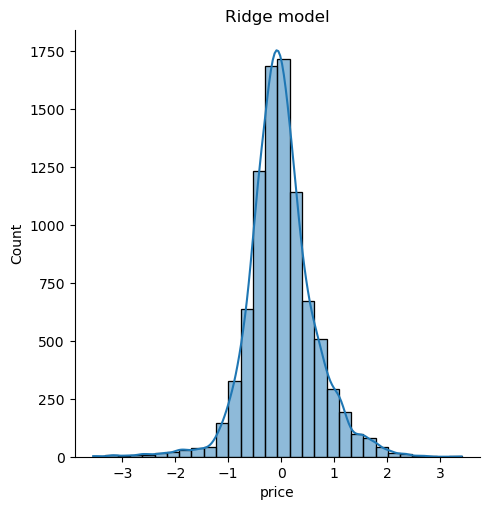

In [136]:
sns.displot(y1_test-ridge_test_preds, bins=30, kde=True)
plt.title("Ridge model")
#plt.savefig('What-Drives-the-Price-of-a-Car/images/Model2_4.png')

# Ordinarily Least Squares (OLS)

In [154]:
ols_pipe = Pipeline([
    ('scaler', StandardScaler()),         # Step for feature scaling
    ('ols', LinearRegression())           # Step for OLS regression
])
ols_pipe

Pipeline(steps=[('scaler', StandardScaler()), ('ols', LinearRegression())])

In [155]:
ols_pipe.fit(X1_train, y1_train)
ols_train_preds = ols_pipe.predict(X1_train)
ols_test_preds = ols_pipe.predict(X1_test)
ols_train_mse = mean_squared_error(y1_train,ols_train_preds)
ols_test_mse = mean_squared_error(y1_test, ols_test_preds)
print(f'OLS Train MSE: {ols_train_mse}')
print(f'OLS Test MSE: {ols_test_mse}')
print(f'OLS Score::{r2_score(y_true=y_test, y_pred=ols_test_preds)}')

OLS Train MSE: 0.3824580886907685
OLS Test MSE: 0.38958467383784096
OLS Score::0.6447921877177836


In [156]:
# Calculate permutation importances
perm_importance = permutation_importance(ols_pipe, X1_test, y1_test, n_repeats=30, random_state=42, n_jobs=-1)
importances = pd.DataFrame(data=perm_importance.importances_mean, index=X_test.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
title = "OLS - Importances and co-efficients"
print(title)
importances.head(10)

OLS - Importances and co-efficients


,Importance
cylinders_3 cylinders,5.062129e+24
cylinders_5 cylinders,5.025180e+24
cylinders_10 cylinders,4.577230e+24
condition_like new,3.781503e+24
manufacturer_jaguar,2.848303e+24
manufacturer_alfa-romeo,2.843185e+24
manufacturer_fiat,2.347528e+24
cylinders_6 cylinders,2.184219e+24
manufacturer_harley-davidson,2.082469e+24
manufacturer_mercedes-benz,1.983552e+24


In [105]:
cv = KFold(n_splits=5)
#model_grid_lasso = GridSearchCV(selector_pipe_lasso, param_grid=sequential_param_dict)
scores4 = cross_val_score(ols_pipe, X1,y1,scoring='neg_mean_squared_error',cv=cv)

In [106]:
cv = KFold(n_splits=5)
#model_grid_lasso = GridSearchCV(selector_pipe_lasso, param_grid=sequential_param_dict)
scores5 = cross_val_score(ols_pipe, X1,y1,scoring='r2',cv=cv)

In [107]:
print('K-Fold Cross Validation ‘neg_mean_squared_error scores: %s' % scores4)
print('K-Fold Cross Validation ‘neg_mean_squared_error: %.3f +/- %.3f' % (np.mean(scores4),np.std(scores4)))
print('K-Fold Cross Validation r^2 scores: %s' % scores5)
print('K-Fold Cross Validation R^2: %.3f +/- %.3f' % (np.mean(scores5),np.std(scores5)))

K-Fold Cross Validation ‘neg_mean_squared_error scores: [-4.00032348e-01 -7.20227619e-01 -3.64811952e-01 -2.96905812e+21
 -3.23517905e-01]
K-Fold Cross Validation ‘neg_mean_squared_error: -593811623773526556672.000 +/- 1187623247547053113344.000
K-Fold Cross Validation r^2 scores: [ 6.17574524e-01  3.75113871e-01  6.70772595e-01 -3.19069679e+21
  7.13260789e-01]
K-Fold Cross Validation R^2: -638139357025904361472.000 +/- 1276278714051808722944.000


/Users/rajeshgoyal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'OLS model')

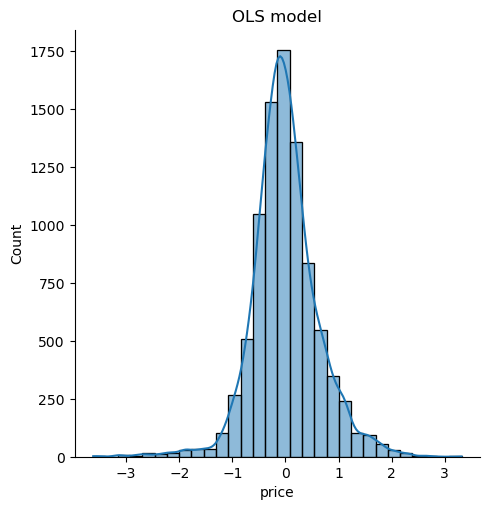

In [135]:
sns.displot(y1_test-ols_test_preds, bins=30, kde=True)
plt.title("OLS model")

#plt.savefig('What-Drives-the-Price-of-a-Car/images/Model2_4.png')

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [112]:
mse_11 = pd.DataFrame([('Ridge', 0.387),
                   ('SEQ', 0.474),
                   ('OLS', 0.389)],
           columns=('Model','MSE')
                 )

In [113]:
plotdata1 = pd.DataFrame(
    {"MSE": [0.387, 0.474, 0.389]}, 
    index=["Ridge", "SEQ", "OLS"])

(array([0, 1, 2]), [Text(0, 0, 'Ridge'), Text(1, 0, 'SEQ'), Text(2, 0, 'OLS')])

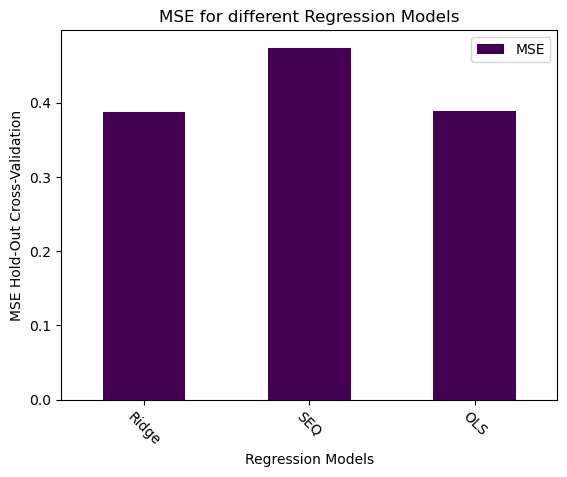

In [130]:
plotdata1.plot(kind="bar",stacked=True,colormap='viridis')
plt.title("MSE for different Regression Models")
plt.xlabel("Regression Models")
plt.ylabel("MSE Hold-Out Cross-Validation")
plt.xticks(rotation=-45)
#plt.savefig('What-Drives-the-Price-of-a-Car/images/MSE_1.png')

In [116]:
plotdata3 = pd.DataFrame(
    {"R^2 Score": [0.646, 0.567,0.644]}, 
    index=["Ridge", "SEQ","OLS"])

(array([0, 1, 2]), [Text(0, 0, 'Ridge'), Text(1, 0, 'SEQ'), Text(2, 0, 'OLS')])

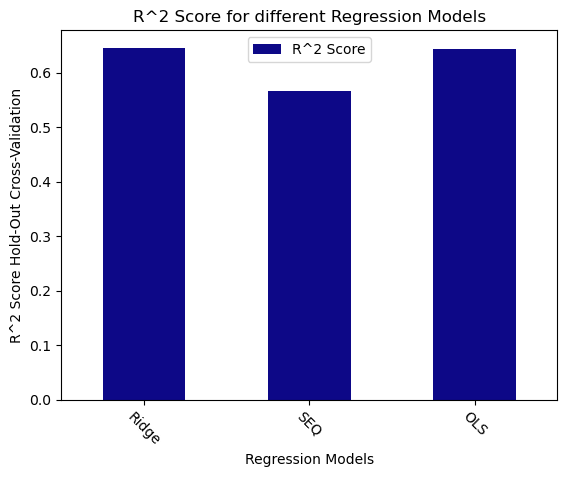

In [133]:
plotdata3.plot(kind="bar",stacked=True,colormap='plasma')
plt.title("R^2 Score for different Regression Models")
plt.xlabel("Regression Models")
plt.ylabel("R^2 Score Hold-Out Cross-Validation")
plt.legend(loc='upper center')
plt.xticks(rotation=-45)
#plt.savefig('What-Drives-the-Price-of-a-Car/images/R2Score_3.png')

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.